In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../results/raw/run1/all_results.csv', delimiter=';')
df.head()

,thread,max threads,time,N,M,steps
0,1,10,4.105771,100,100,100
1,7,10,4.101599,100,100,100
2,6,10,4.114198,100,100,100
3,9,10,4.112490,100,100,100
4,8,10,4.125710,100,100,100


In [12]:
df_simple = df.groupby(["max threads", "N", "M", "steps"], as_index=False).time.max()
df_simple.head()

,max threads,N,M,steps,time
0,2,100,100,100,2.265348
1,2,100,100,1000,25.664156
2,2,100,100,10000,254.450257
3,2,100,100,100000,1004.572155
4,2,1000,1000,100,3.279697


In [19]:
def create_pivot_for_max_threads(max_threads)-> pd.DataFrame:
  df_filtered = df_simple[df_simple["max threads"] == max_threads].copy()
  df_filtered["NM"] = df_filtered["N"].astype(str) + "x" + df_filtered["M"].astype(str)
  return df_filtered.pivot_table(index="NM", columns="steps", values="time")

In [22]:
for max_threads in df_simple["max threads"].unique():
  df_pivot = create_pivot_for_max_threads(max_threads)
  df_pivot.columns = [str(col) for col in df_pivot.columns]
  df_pivot.index.name = "N x M"
  df_pivot.columns.name = "steps"
  print(f"max threads: {max_threads}")
  print(df_pivot)
  print()



max threads: 2
steps           100       1000       10000       100000
N x M                                                  
1000x1000  3.279697  13.802512  296.131268  1321.086374
100x100    2.265348  25.664156  254.450257  1004.572155
2000x2000  1.751833  18.256587  390.682163  1769.933321

max threads: 4
steps           100       1000       10000       100000
N x M                                                  
1000x1000  4.387131  41.162546  413.733525  3183.611950
100x100    3.090171  30.804490  307.866536  3081.436200
2000x2000  3.805394  36.618069  362.170274  4599.070011

max threads: 10
steps         100       1000       10000
N x M                                   
100x100  4.161384  41.001822  408.918286



In [32]:
def plot_time_steps_and_size(df, threads):
       subset = df[df["max threads"] == threads].copy()
       subset["Size"] = subset["N"].astype(str) + "x" + subset["M"].astype(str)
       subset = subset.sort_values("steps")
       

       sns.set_theme(style="whitegrid", palette="colorblind")
       
       plt.figure(figsize=(8, 5))
       ax = sns.lineplot(
              data=subset,
              x="steps",
              y="time",
              hue="Size",
              marker="o"
       )
       
       ax.set_title(f"Performance for {threads} threads", fontsize=14)
       ax.set_xlabel("Steps", fontsize=12)
       ax.set_ylabel("Time (s)", fontsize=12)
       ax.grid(True, linestyle="--", linewidth=0.5)
       plt.legend(title="Size", title_fontsize=12, fontsize=10)
       plt.tight_layout()
       plt.show()

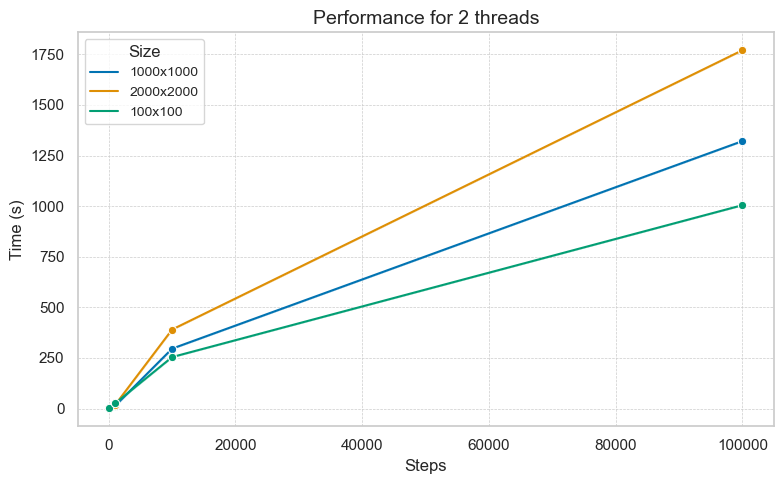

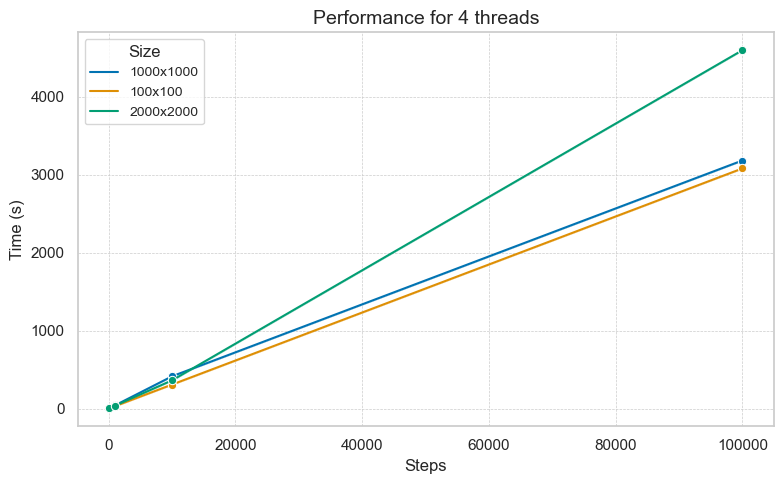

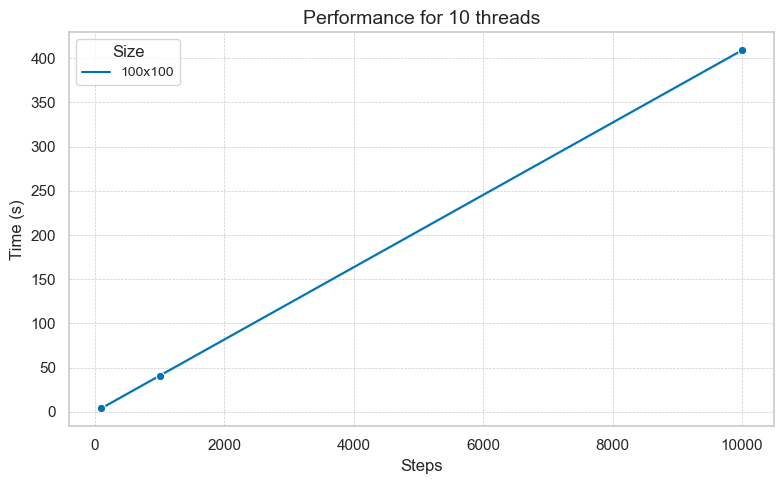

In [33]:
for max_threads in df_simple["max threads"].unique():
  plot_time_steps_and_size(df, max_threads)